In [6]:
import sys
sys.path.append('../scripts')
from analysis import get_sentiment

In [5]:
import pandas as pd
import talib
import matplotlib.pyplot as plt

In [4]:
import sys
sys.path.append('..')

In [5]:
def load(path):
    """
    Load the dataset from a CSV file and return it as a pandas DataFrame.
    """
    df = pd.read_csv(path)
    df['Date'] = pd.to_datetime(df['Date'])
    return df

In [6]:
stock_data_aapl = load("../src/data/AAPL_historical_data.csv")
stock_data_goog = load("../src/data/GOOG_historical_data.csv")
stock_data_amzn = load("../src/data/AMZN_historical_data.csv")
stock_data_msft = load("../src/data/MSFT_historical_data.csv")
stock_data_nvda = load("../src/data/NVDA_historical_data.csv")
stock_data_tsla = load("../src/data/TSLA_historical_data.csv")
stock_data_meta = load("../src/data/META_historical_data.csv")

In [7]:
stock_data_aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [8]:
stock_data_aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10998 non-null  datetime64[ns]
 1   Open          10998 non-null  float64       
 2   High          10998 non-null  float64       
 3   Low           10998 non-null  float64       
 4   Close         10998 non-null  float64       
 5   Adj Close     10998 non-null  float64       
 6   Volume        10998 non-null  int64         
 7   Dividends     10998 non-null  float64       
 8   Stock Splits  10998 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 773.4 KB


* Analysis Closing PriceWithDate

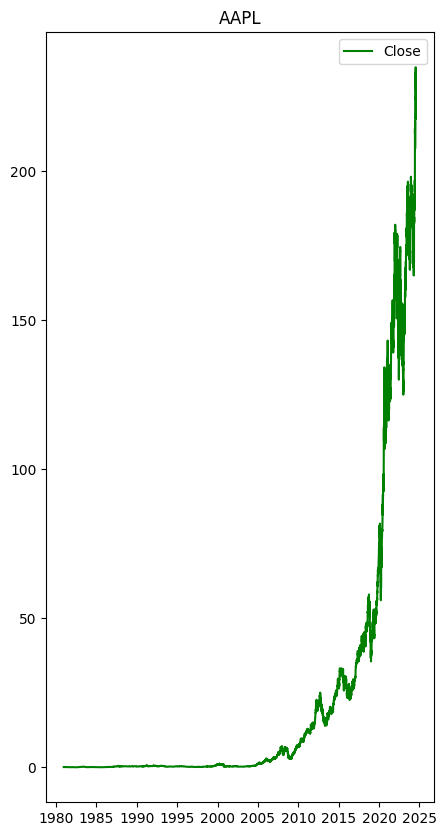

In [ ]:
fig, axs = plt.subplots(figsize=(5, 10))  # Adjust figsize as needed
axs.plot(stock_data_aapl['Date'], stock_data_aapl['Close'], label='Close',color='green')
axs.set_title('AAPL')
axs.legend()
plt.show()

* TA-Lib - Technical Analysis

In [11]:

stock_data_aapl['SMA'] = talib.SMA(stock_data_aapl['Close'], timeperiod=20)
stock_data_aapl['RSI'] = talib.RSI(stock_data_aapl['Close'], timeperiod=14)
stock_data_aapl['EMA'] = talib.EMA(stock_data_aapl['Close'], timeperiod=20)

macd_signal, macd, _ = talib.MACD(stock_data_aapl['Close'])
stock_data_aapl['MACD'] =macd
stock_data_aapl['MACD_Signal']=macd_signal


# Visual represent the relationship between technical indicators and closing price.

* Closing price VS Moving Average Convergence Divergence (MACD) Indicator

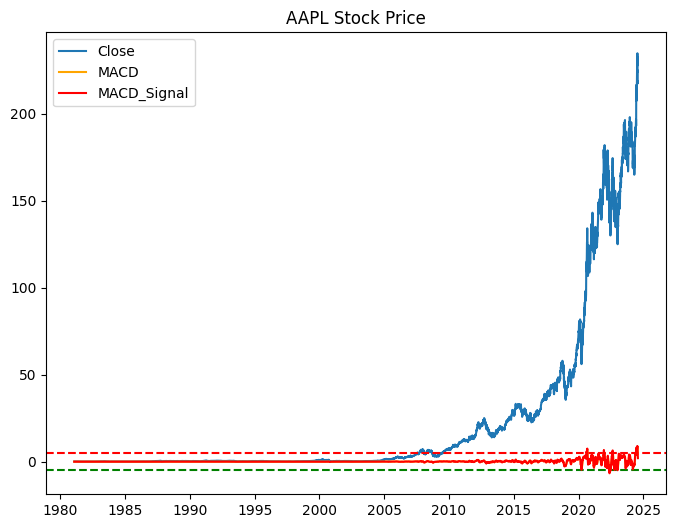

In [22]:
fig, axs = plt.subplots(figsize=(8,6))

# for AAPL
axs.plot(stock_data_aapl['Date'], stock_data_aapl['Close'],label="Close")
axs.set_title("AAPL Stock Price")
axs.legend()
axs.axhline(y=5, color='r',linestyle="--")
axs.axhline(y=-5, color='g',linestyle="--")
axs.plot(stock_data_aapl['Date'],stock_data_aapl['MACD'], color='orange', label="MACD")
axs.plot(stock_data_aapl['Date'],stock_data_aapl['MACD_Signal'], color='r', label="MACD_Signal")
axs.legend()
plt.show()

In [12]:
stock_data_aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [16]:
stock_data_aapl.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Dividends        0
Stock Splits     0
SMA             19
RSI             14
EMA             19
MACD            33
MACD_Signal     33
dtype: int64

In [17]:
stock_data_aapl.dropna(inplace=True)

In [26]:
stock_data_aapl["MACD"].head()

33    0.001789
34    0.001045
35    0.000282
36   -0.000382
37   -0.000949
Name: MACD, dtype: float64